In [80]:
import IPython.display as disp
import pandas
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Intro to Data Science<br/> Problem Set 3: Analyzing Subway Data
The following notes are a summary on [Udacity's online course](https://www.udacity.com/course/intro-to-data-science--ud359)

In [81]:
def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    plt.figure()
    df_rain = turnstile_weather[(turnstile_weather['rain'] == 1) & (turnstile_weather['ENTRIESn_hourly'] <= 6000)] # your code here to plot a historgram for hourly entries when it is raining
    df_no_rain = turnstile_weather[(turnstile_weather['rain'] == 0) & (turnstile_weather['ENTRIESn_hourly'] <= 6000)] # your code here to plot a historgram for hourly entries when it is not raining
    
    df_no_rain['ENTRIESn_hourly'].hist(label="No Rain")
    df_rain['ENTRIESn_hourly'].hist(label="Rain")
    
    plt.legend(loc='upper right');
    
    return plt


<module 'matplotlib.pyplot' from '/Developer/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

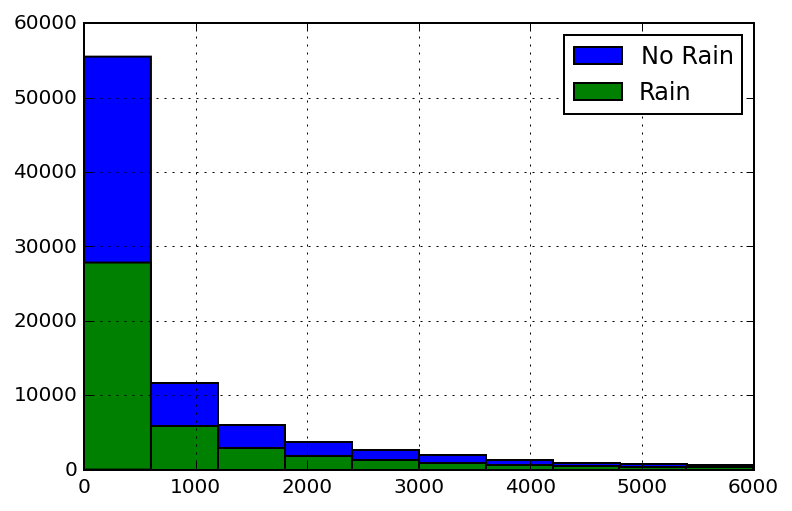

In [82]:
df = pandas.read_csv("turnstile_data_master_with_weather.csv")
entries_histogram(df)

### Does the entries data seem normally distributed?
By taking a look at the histogram chart, both sample datasets do not seem to be normally distributed for the sample size given.

### Can we run Welch's T test on entries data? Why or why not?
There are options better than Welch's T Test to use on entries data when the datasets are not normally distributed. It is better to suggest to use the Mann-Whitney U Test for data that isn't normal.

In [83]:
def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    df_rain = turnstile_weather[turnstile_weather['rain'] == 1].ENTRIESn_hourly
    df_no_rain = turnstile_weather[turnstile_weather['rain'] == 0].ENTRIESn_hourly
    
    with_rain_mean = df_rain.mean()
    without_rain_mean = df_no_rain.mean()
    
    U,p = scipy.stats.mannwhitneyu(df_rain, df_no_rain)
    
    return with_rain_mean, without_rain_mean, U, p # leave this line for the grader

In [84]:
with_rain_mean, without_rain_mean, U, p = mann_whitney_plus_means(df)

# Scipy's Mann Whitney U test returns a one tailed p value, multiply by two to make it two tailed.
p = p*2

print(with_rain_mean, without_rain_mean, U, p)

(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.049999825586979442)


### Is the distribution of the number of entries statistically different between rainy and non rainy days?
Since the returned P value is less than the critical value of .05, we can suggest that the number of entries are statistically different between rainy and non rainy days, so we reject the null hypothesis that the two population distributions are identical.

In [147]:
"""
In this question, you need to:
1) implement the linear_regression() procedure
2) Select features (in the predictions procedure) and make predictions.

"""

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    
    This can be the same code as in the lesson #3 exercise.
    """
    
    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    intercept = results.params[0]
    params = results.params[1:]
    
    return intercept, params

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~10%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally. If you do, you may want to complete Exercise
    8 using gradient descent, or limit your number of features to 10 or so, since ordinary
    least squares can be very slow for a large number of features.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features.
    '''
    ################################ MODIFY THIS SECTION #####################################
    # Select features. You should modify this section to try different features!             #
    # We've selected rain, precipi, Hour, meantempi, and UNIT (as a dummy) to start you off. #
    # See this page for more info about dummy variables:                                     #
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html          #
    ##########################################################################################
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    
    predictions = intercept + np.dot(features, params)
    return predictions

In [148]:
def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure()
    (turnstile_weather["ENTRIESn_hourly"] - predictions).hist(bins=100)
    return plt

<module 'matplotlib.pyplot' from '/Developer/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

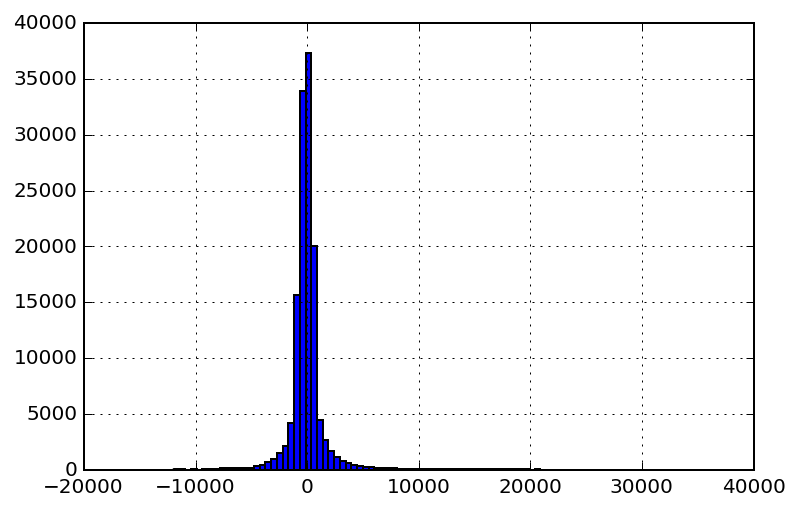

In [149]:
df_predictions = predictions(df)
plot_residuals(df, df_predictions)

In [150]:
def compute_r_squared(data, predictions):
    # Write a function that, given two input numpy arrays, 'data', and 'predictions,'
    # returns the coefficient of determination, R^2, for the model that produced 
    # predictions.
    # 
    # Numpy has a couple of functions -- np.mean() and np.sum() --
    # that you might find useful, but you don't have to use them.

    # YOUR CODE GOES HERE
    SST = ((data-np.mean(data))**2).sum()
    SSReg = ((predictions-data)**2).sum()
    r_squared = 1 - SSReg / SST
    return r_squared

In [151]:
compute_r_squared(df["ENTRIESn_hourly"], df_predictions)

0.45804446474052984

In [ ]:
def plot_weather_data(turnstile_weather):
    ''' 
    plot_weather_data is passed a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make another data visualization
    focused on the MTA and weather data we used in Project 3.
    
    Make a type of visualization different than what you did in the previous exercise.
    Try to use the data in a different way (e.g., if you made a lineplot concerning 
    ridership and time of day in exercise #1, maybe look at weather and try to make a 
    histogram in this exercise). Or try to use multiple encodings in your graph if 
    you didn't in the previous exercise.
    
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time-of-day or day-of-week
     * How ridership varies by subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out the link 
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    to see all the columns and data points included in the turnstile_weather 
    dataframe.
     
   However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''

    plot = # your code here
    return plot

In [3]:
def css_styling():
    styles = open("../css/custom.css", "r").read()
    return disp.HTML(styles)
css_styling()